# Вариант 5.4

### Сингулярно-возмущенная система - модель двухлампового генератора Фрюгауфа.

Сингулярно-возмущенная система имеет вид:
\begin{cases}
\varepsilon \dot{x}_1 = - \alpha (y_1 - y_2) + \phi (x_1) - x_2 \\
\varepsilon \dot{x}_2 =   \alpha (y_1 - y_2) + \phi (x_2) - x_1 \\
\dot{y}_1 = x_1 \\
\dot{y}_2 = x_2
\end{cases}
где $\alpha > 0$ - константа порядка единицы, функция 
$\phi (u) = - \tan (\pi u /2)$, 
$x_1 (0) = x_2 (0) = 0$, 
$y_1 (0) = 2$, 
$y_2 (0) = 0$.

Будем рассматривать $\varepsilon = 10^{-3}$ и $\varepsilon = 10^{-6}$. Конечное время интегрирования системы $T_k = 20$.

Для численного решения используются ФДН-методы:

\begin{array}{lllll}
k = 2: &\dfrac{3}{2} y_{n+1} &-2 y_n &+\dfrac{1}{2} y_{n-1} & & &= h f_{n+1} \\
k = 3: &\dfrac{11}{6} y_{n+1} &-3 y_n &+\dfrac{3}{2} y_{n-1} &-\dfrac{1}{3} y_{n-2} & &= h f_{n+1} \\
k = 4: &\dfrac{25}{12} y_{n+1} &-4 y_n &+3 y_{n-1} &-\dfrac{4}{3} y_{n-2} &+\dfrac{1}{4} y_{n-3} &= h f_{n+1}
\end{array}
причем значения в недостающих точках доопределеяются с помощью метода Рунге-Кутты (таблица 2)

\begin{array}{c|cc}
\dfrac{2+\sqrt{2}}{2} & \dfrac{2+\sqrt{2}}{2} & 0 \\
\dfrac{2-\sqrt{2}}{2} & -\sqrt{2}             & \dfrac{2+\sqrt{2}}{2} \\
\hline \\
                      & 1/2                   & 1/2
\end{array}
<center>Таблица 1</center>

\begin{array}{c|cc}
\label{rk2}
\dfrac{3+\sqrt{3}}{6} & \dfrac{3+\sqrt{3}}{6} & 0 \\
\dfrac{3-\sqrt{3}}{6} & \dfrac{3-2\sqrt{3}}{6}& \dfrac{3+\sqrt{3}}{6} \\
\hline \\
                      & 1/2                   & 1/2
\end{array}
<center>Таблица 2</center>

<b>Задание</b>
1. Сравнить полученные результаты с результатами вычислений по однократно диагональным неявным методам Рунге-Кутты с двумя стадиями (второго порядка аппроксимации, асимптотически устойчивому, таблица 1 и третьего порядка аппроксимации, таблица 2)
2. Построить функции устойчивости всех используемых численных методов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Потом поменяем на 10**(-6) (требуется в задании)
epsilon = 10**(0)
# Положим alpha за 1
alpha = 5
# Зададим phi
phi = lambda u: -np.tan(np.pi*u/2)

# Зададим систему
''' 
Переменные идут в следующем порядке:
    x_1==y[0], x_2==y[1], y_1==y[2], y_2==y[3]
Порядок тут важен!
'''
#'''
system_of_eqs = lambda t, y: [
    1/epsilon*(-alpha*(y[2] - y[3]) + phi(y[0]) - y[1]),
    1/epsilon*( alpha*(y[2] - y[3]) + phi(y[1]) - y[0]),
    y[0],
    y[1]
]
#'''
# Начальный вектор: y(0) = [...]
y0 = [0, 0, 2, 0]

Составим решение методом Рунге-Кутты второго и третьего порядка

In [3]:
t = np.linspace(0, 20, 10**4)

In [4]:
from scipy.integrate import solve_ivp
ivp_rk2_1 = solve_ivp(system_of_eqs, (min(t), max(t)), y0, method='RK23', t_eval=t)
ivp_rk3_1 = solve_ivp(system_of_eqs, (min(t), max(t)), y0, method='RK45', t_eval=t)

Построим методы ФДН с разным числом шагов и сравним их между собой:

In [5]:
ivp_bdf2_1 = solve_ivp(system_of_eqs, (min(t), max(t)), y0, method='BDF', t_eval=t, rtol=5*10**-4,
                      params={'order': 2})
ivp_bdf3_1 = solve_ivp(system_of_eqs, (min(t), max(t)), y0, method='BDF', t_eval=t, rtol=10**-4,
                      params={'order': 3})
ivp_bdf4_1 = solve_ivp(system_of_eqs, (min(t), max(t)), y0, method='BDF', t_eval=t, rtol=10**-5,
                      params={'order': 4})

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\_ivp\common.py:41: UserWarning: The following arguments have no effect for a chosen solver: `params`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


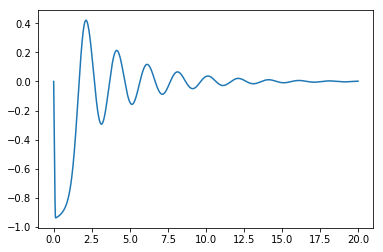

In [6]:
plt.plot(ivp_bdf4_1.t, ivp_bdf4_1.y[0, :])

Для сравнения построим график невязки между методам для каждой из переменной $x_1$, $y_1$, $x_2$, $y_2$

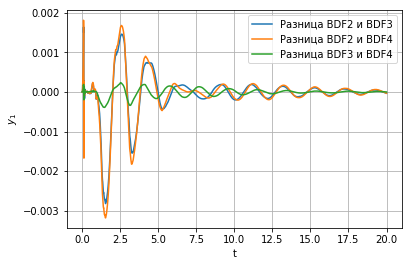

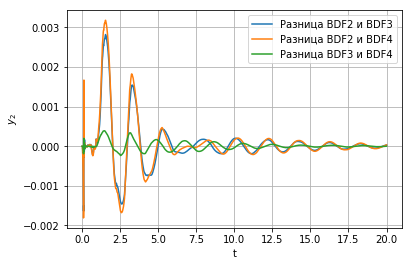

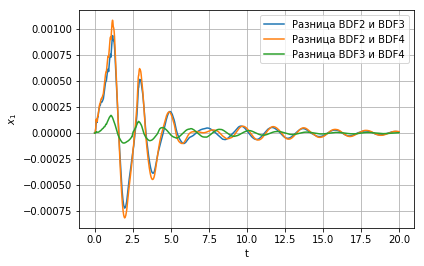

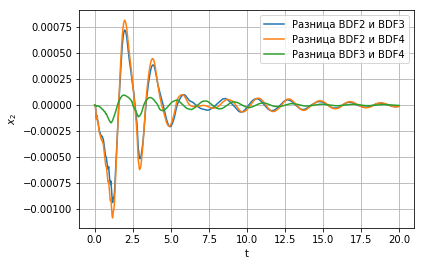

In [7]:
for i in range(4):
    plt.plot(ivp_bdf2_1.t, ivp_bdf2_1.y[i, :] - ivp_bdf3_1.y[i, :], label='Разница BDF2 и BDF3', )
    plt.plot(ivp_bdf3_1.t, ivp_bdf2_1.y[i, :] - ivp_bdf4_1.y[i, :], label='Разница BDF2 и BDF4', )
    plt.plot(ivp_bdf4_1.t, ivp_bdf3_1.y[i, :] - ivp_bdf4_1.y[i, :], label='Разница BDF3 и BDF4', )
    plt.xlabel('t')
    plt.ylabel({0: r'$y_1$', 1: r'$y_2$', 2: r'$x_1$', 3: r'$x_2$'}[i])
    plt.grid()
    plt.legend()
    plt.show()

Из графиков видно, что наибольшная невязка достигается между методами ФДН4 и ФДН2. Это обусловлено тем, что четырехшаговый метод оказывается более точным, чем двухшаговый. Переход от трехшагового метода к четырехшаговому сопроводился меньшим изменением невязки, нежели переход от двухшагового к трехшаговому. Вполне возможно, что для данной задачи выбор четырехшагового метода является оптимальным.

Построим на одном листе графики решения двумя методами РК и одним из предложенных ФДН для каждой из переменных.

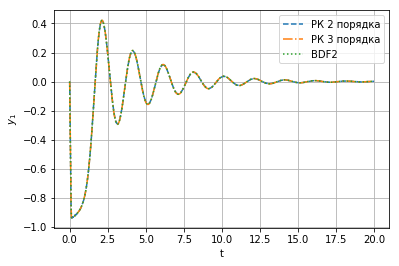

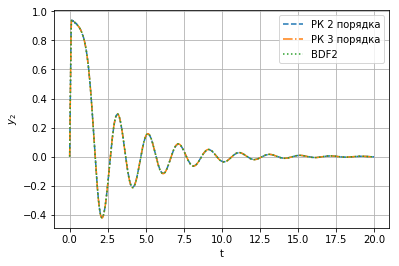

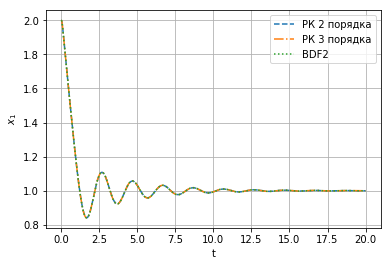

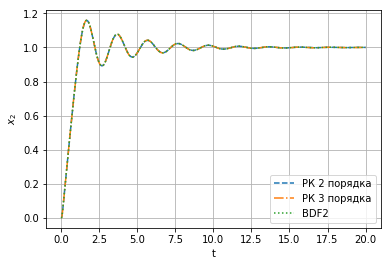

In [8]:
for i in range(4):
    plt.plot(ivp_rk2_1.t, ivp_rk2_1.y[i, :], label='РК 2 порядка', linestyle='--')
    plt.plot(ivp_rk3_1.t, ivp_rk3_1.y[i, :], label='РК 3 порядка', linestyle='-.')
    plt.plot(ivp_bdf2_1.t, ivp_bdf2_1.y[i, :], label='BDF2', linestyle=':')
    plt.xlabel('t')
    plt.ylabel({0: r'$y_1$', 1: r'$y_2$', 2: r'$x_1$', 3: r'$x_2$'}[i])
    plt.grid()
    plt.legend()
    plt.show()

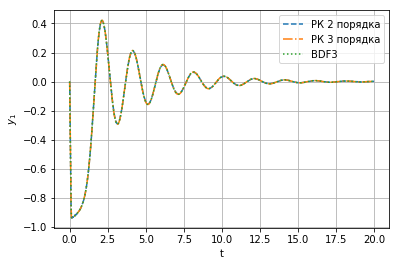

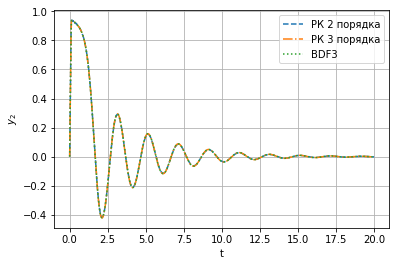

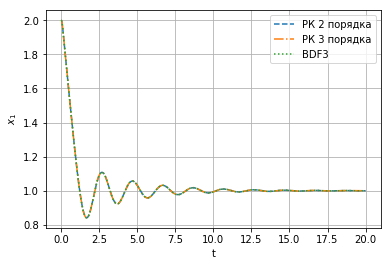

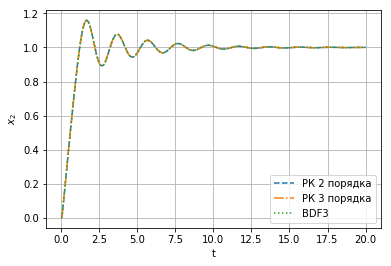

In [9]:
for i in range(4):
    plt.plot(ivp_rk2_1.t, ivp_rk2_1.y[i, :], label='РК 2 порядка', linestyle='--')
    plt.plot(ivp_rk3_1.t, ivp_rk3_1.y[i, :], label='РК 3 порядка', linestyle='-.')
    plt.plot(ivp_bdf2_1.t, ivp_bdf3_1.y[i, :], label='BDF3', linestyle=':')
    plt.xlabel('t')
    plt.ylabel({0: r'$y_1$', 1: r'$y_2$', 2: r'$x_1$', 3: r'$x_2$'}[i])
    plt.grid()
    plt.legend()
    plt.show()

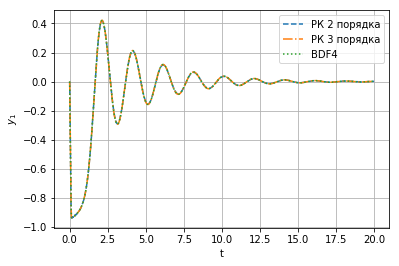

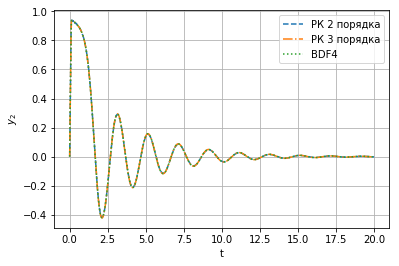

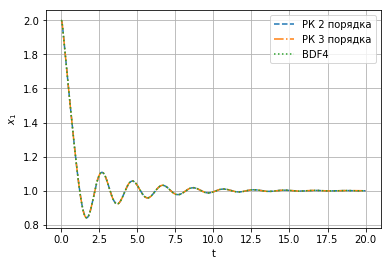

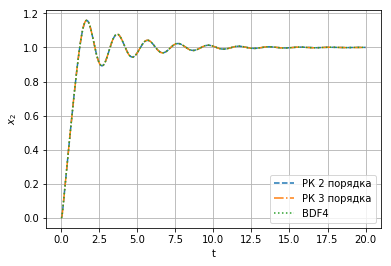

In [10]:
for i in range(4):
    plt.plot(ivp_rk2_1.t, ivp_rk2_1.y[i, :], label='РК 2 порядка', linestyle='--')
    plt.plot(ivp_rk3_1.t, ivp_rk3_1.y[i, :], label='РК 3 порядка', linestyle='-.')
    plt.plot(ivp_bdf2_1.t, ivp_bdf4_1.y[i, :], label='BDF4', linestyle=':')
    plt.xlabel('t')
    plt.ylabel({0: r'$y_1$', 1: r'$y_2$', 2: r'$x_1$', 3: r'$x_2$'}[i])
    plt.grid()
    plt.legend()
    plt.show()

Методы не дают принципиально различных результатов. Построим теперь разницу между методами РК и ФНД для двух-, трех- и четырехстадийного метода

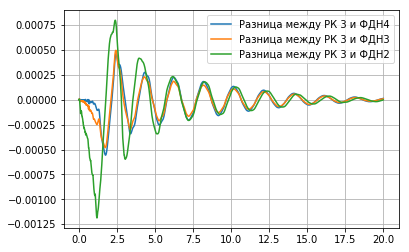

In [11]:
# Сравним метод Рунге-Кутты 3 с методом ФДН4
plt.plot(ivp_rk3_1.t, ivp_rk3_1.y[2,:] - ivp_bdf4_1.y[2,:], label='Разница между РК 3 и ФДН4')

plt.legend()
plt.grid()

# Сравним метод Рунге-Кутты 3 с методом ФДН3
plt.plot(ivp_rk3_1.t, ivp_rk3_1.y[2,:] - ivp_bdf3_1.y[2,:], label='Разница между РК 3 и ФДН3')

plt.legend()
plt.grid()

# Сравним метод Рунге-Кутты 3 с методом ФДН2
plt.plot(ivp_rk3_1.t, ivp_rk3_1.y[2,:] - ivp_bdf2_1.y[2,:], label='Разница между РК 3 и ФДН2')

plt.legend()
plt.grid()

Видим, что метод двуххстадийный метод ФДН дает наибольшую невязку. Это связано с тем, что в области быстрого режима (в нашей задаче это диапазон $t \in [0, 2.5]$) ошибки методов, а следовательно, и их невязки, будут очень быстро расти при вычислениях. Невязка метода ФДН2 как раз показывает эту закономерность.

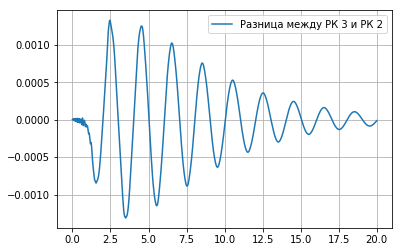

In [12]:
# Сравним методы Рунге-Кутты между собой
plt.plot(ivp_rk3_1.t, ivp_rk3_1.y[2,:] - ivp_rk2_1.y[2,:], label='Разница между РК 3 и РК 2')

plt.legend()
plt.grid()

В случае метода Рунге-Кутты третьего порядка невязка принимает и отрицательные значения. Это означает, что метод третьего порядка более точен, если полагать, что ФДН дает лучшие результаты для заданной системы, поскольку осцилляция невязки означает, что метод РК третьего порядка быстрее приближается к решению задачи. Более того, абсолютная величина невзяки для такого РК меньше во всех точках, чем у метода РК второго порядка.

Для случая $\varepsilon = 10^{-6}$:

In [13]:
# Потом поменяем на 10**(-6) (требуется в задании)
epsilon = 10**(-6)
# Положим alpha за 1
alpha = 1
# Зададим phi
phi = lambda u: -np.tan(np.pi*u/2)

# Зададим систему
''' 
Переменные идут в следующем порядке:
    y_1==y[0], y_2==y[1], x_1==y[2], x_2==y[3]
Порядок тут важен!
'''
system_of_eqs = lambda t, y: [
    # y_1
    y[2],
    # y_2
    y[3],
    # x_1
    1/epsilon*(-alpha*(y[0] - y[1]) + phi(y[2]) - y[3]),
    # x_2
    1/epsilon*(alpha*(y[0] - y[1]) + phi(y[3]) - y[2])
]

# Начальный вектор: y(0) = [...]
y0 = [2, 0, 0, 0]

Составим решение методом Рунге-Кутты второго и третьего порядка

In [14]:
from scipy.integrate import solve_ivp
ivp_rk2_2 = solve_ivp(system_of_eqs, (min(t), max(t)), y0, method='RK23', t_eval=t)
ivp_rk3_2 = solve_ivp(system_of_eqs, (min(t), max(t)), y0, method='RK45', t_eval=t)

Построим методы ФДН с разным числом шагов и сравним их между собой:

In [15]:
ivp_bdf2_2 = solve_ivp(system_of_eqs, (min(t), max(t)), y0, method='BDF', t_eval=t, rtol=5*10**-4,
                      params={'order': 2})
ivp_bdf3_2 = solve_ivp(system_of_eqs, (min(t), max(t)), y0, method='BDF', t_eval=t, rtol=10**-4,
                      params={'order': 3})
ivp_bdf4_2 = solve_ivp(system_of_eqs, (min(t), max(t)), y0, method='BDF', t_eval=t, rtol=10**-5,
                      params={'order': 4})

Для сравнения построим график невязки между методам для каждой из переменной $x_1$, $y_1$, $x_2$, $y_2$

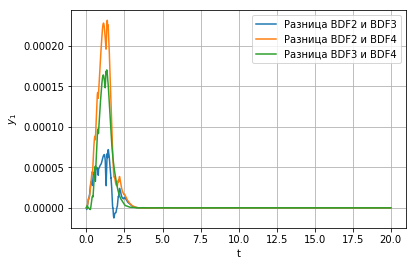

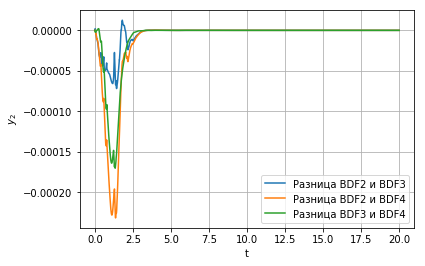

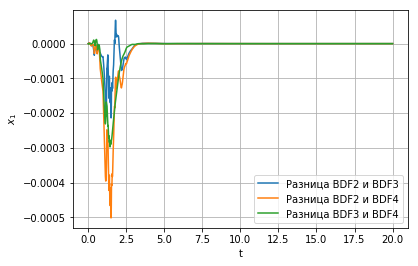

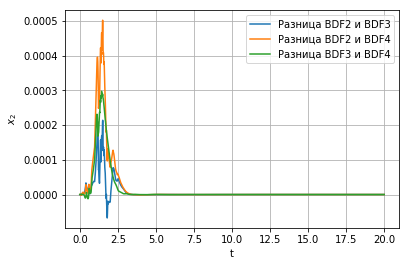

In [16]:
for i in range(4):
    plt.plot(ivp_bdf2_2.t, ivp_bdf2_2.y[i, :] - ivp_bdf3_2.y[i, :], label='Разница BDF2 и BDF3', )
    plt.plot(ivp_bdf3_2.t, ivp_bdf2_2.y[i, :] - ivp_bdf4_2.y[i, :], label='Разница BDF2 и BDF4', )
    plt.plot(ivp_bdf4_2.t, ivp_bdf3_2.y[i, :] - ivp_bdf4_2.y[i, :], label='Разница BDF3 и BDF4', )
    plt.xlabel('t')
    plt.ylabel({0: r'$y_1$', 1: r'$y_2$', 2: r'$x_1$', 3: r'$x_2$'}[i])
    plt.grid()
    plt.legend()
    plt.show()

Из графиков видно, что наибольшная невязка тоже достигается между методами ФДН4 и ФДН2. Это обусловлено тем, что четырехшаговый метод оказывается более точным, чем двухшаговый. Переход от трехшагового метода к четырехшаговому сопроводился меньшим изменением невязки, нежели переход от двухшагового к трехшаговому. Вполне возможно, что для данной задачи выбор четырехшагового метода является оптимальным.

Построим на одном листе графики решения двумя методами РК и одним из предложенных ФДН для каждой из переменных.

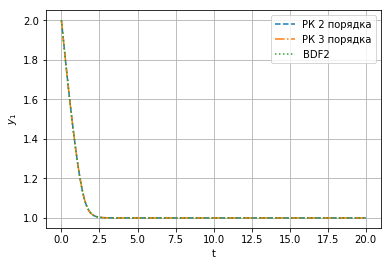

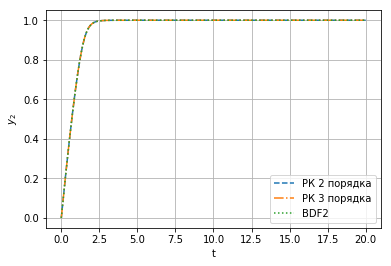

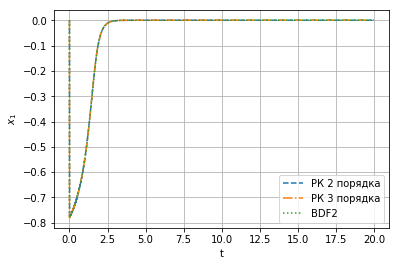

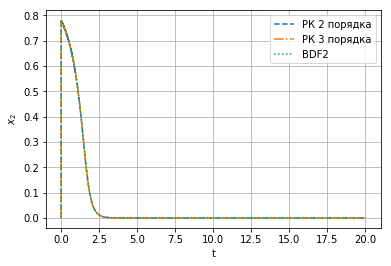

In [17]:
for i in range(4):
    plt.plot(ivp_rk2_2.t, ivp_rk2_2.y[i, :], label='РК 2 порядка', linestyle='--')
    plt.plot(ivp_rk3_2.t, ivp_rk3_2.y[i, :], label='РК 3 порядка', linestyle='-.')
    plt.plot(ivp_bdf2_2.t, ivp_bdf2_2.y[i, :], label='BDF2', linestyle=':')
    plt.xlabel('t')
    plt.ylabel({0: r'$y_1$', 1: r'$y_2$', 2: r'$x_1$', 3: r'$x_2$'}[i])
    plt.grid()
    plt.legend()
    plt.show()

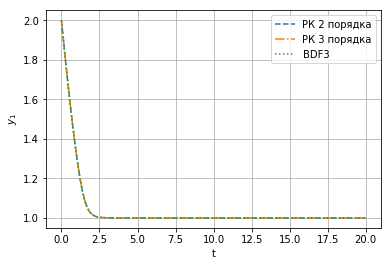

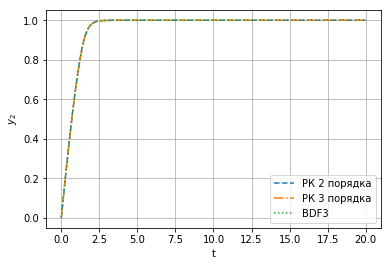

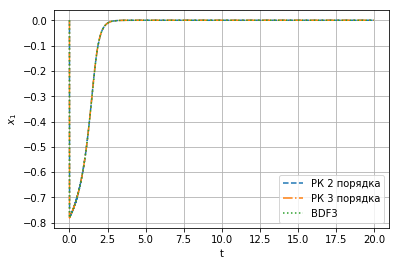

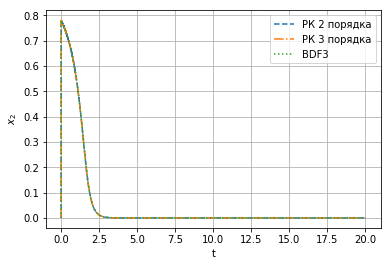

In [18]:
for i in range(4):
    plt.plot(ivp_rk2_2.t, ivp_rk2_2.y[i, :], label='РК 2 порядка', linestyle='--')
    plt.plot(ivp_rk3_2.t, ivp_rk3_2.y[i, :], label='РК 3 порядка', linestyle='-.')
    plt.plot(ivp_bdf2_2.t, ivp_bdf3_2.y[i, :], label='BDF3', linestyle=':')
    plt.xlabel('t')
    plt.ylabel({0: r'$y_1$', 1: r'$y_2$', 2: r'$x_1$', 3: r'$x_2$'}[i])
    plt.grid()
    plt.legend()
    plt.show()

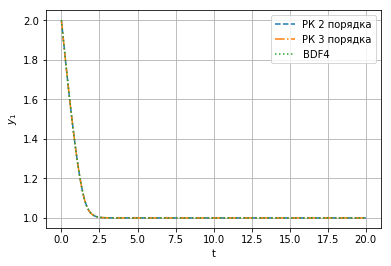

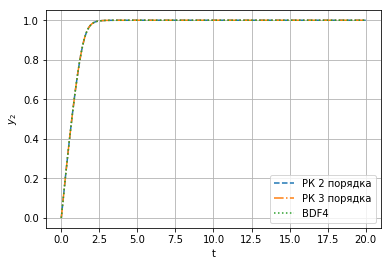

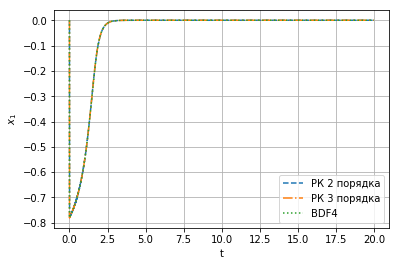

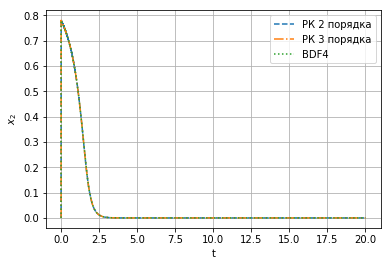

In [19]:
for i in range(4):
    plt.plot(ivp_rk2_2.t, ivp_rk2_2.y[i, :], label='РК 2 порядка', linestyle='--')
    plt.plot(ivp_rk3_2.t, ivp_rk3_2.y[i, :], label='РК 3 порядка', linestyle='-.')
    plt.plot(ivp_bdf2_2.t, ivp_bdf4_2.y[i, :], label='BDF4', linestyle=':')
    plt.xlabel('t')
    plt.ylabel({0: r'$y_1$', 1: r'$y_2$', 2: r'$x_1$', 3: r'$x_2$'}[i])
    plt.grid()
    plt.legend()
    plt.show()

Методы также не дают принципиально различных результатов. Построим теперь разницу между методами РК и ФНД для двух-, трех- и четырехстадийного метода

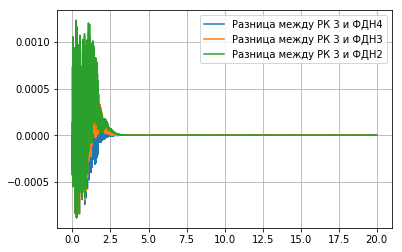

In [20]:
# Сравним метод Рунге-Кутты 3 с методом ФДН4
plt.plot(ivp_rk3_2.t, ivp_rk3_2.y[2,:] - ivp_bdf4_2.y[2,:], label='Разница между РК 3 и ФДН4')

plt.legend()
plt.grid()

# Сравним метод Рунге-Кутты 3 с методом ФДН3
plt.plot(ivp_rk3_2.t, ivp_rk3_2.y[2,:] - ivp_bdf3_2.y[2,:], label='Разница между РК 3 и ФДН3')

plt.legend()
plt.grid()

# Сравним метод Рунге-Кутты 3 с методом ФДН2
plt.plot(ivp_rk3_2.t, ivp_rk3_2.y[2,:] - ivp_bdf2_2.y[2,:], label='Разница между РК 3 и ФДН2')

plt.legend()
plt.grid()

Видим, что метод двуххстадийный метод ФДН дает наибольшую невязку. Это связано с тем, что в области быстрого режима (в нашей задаче это диапазон $t \in [0, 2.5]$) ошибки методов, а следовательно, и их невязки, будут очень быстро расти при вычислениях. Невязка метода ФДН2 как раз показывает эту закономерность.

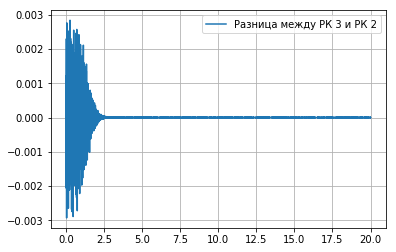

In [21]:
# Сравним методы Рунге-Кутты между собой
plt.plot(ivp_rk3_2.t, ivp_rk3_2.y[2,:] - ivp_rk2_2.y[2,:], label='Разница между РК 3 и РК 2')

plt.legend()
plt.grid()

Сравнение методов Рунге-Кутты второго и третьего порядка показывает, что 3 порядок дает меньшую ошибку. Осцилляции в невязке присутствуют в обоих случаях. Стоит обратить внимание на время выполнения подсчета: использование методов РК приводит к долгим подсчетам (40 минут в ячейке выше) по сравнению с ФДН.

В общем и целом, поведение графиков невязок схожее для обоих $\varepsilon=10^{-3}$ и $\varepsilon=10^{-6}$. Основное различие - абсолютные значения невязок, которые в случае $\varepsilon=10^{-6}$ оказались больше. Это объяснимо тем, что при приближении $\varepsilon \rightarrow 0$ к нулю задача будет становиться все более жесткой и даже неявные методы станут давать большую невязку.

Последний пункт задания - построить функции устойчивости для всех используемых методов. Напомним, что функцией устойчивости называется такая $R(z)$, что $y_{n+1} = R(z) y_n$, где $z = \lambda h$, а $\lambda$ определяется уравнением $y' = \lambda y$.

\begin{array}{lll} 
k = 2: & \dfrac{3}{2} R^2 - 2R + \dfrac{1}{2} = h \dfrac{z}{h} R^2 &\Leftrightarrow & R = 2 \pm \sqrt{1 + 2z} \\
k = 3: & \dfrac{11}{6} R^3 - 3 R^2 + \dfrac{3}{2} R - \dfrac{1}{3} = h \dfrac{z}{h} R^3 & \Leftrightarrow
& R = R_3(z) \text{ (выражение опущено в виду его громоздкости)} \\
k = 4: & \dfrac{25}{12} R^4 - 4 R^3 + 3 R^2 - \dfrac{4}{3} R + \dfrac{1}{4} = h \dfrac{z}{h} R^4 & \Leftrightarrow
& R = R_4(z)
\end{array}

Построим эти функции с помощью ЭВМ (наше счастье, что они умеют работать с такими вещами)

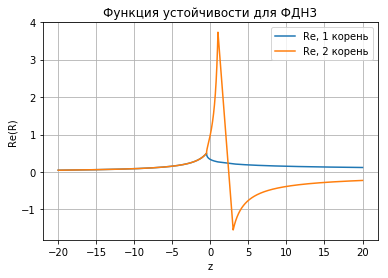

<string>:2: RuntimeWarning: invalid value encountered in power
<string>:2: RuntimeWarning: invalid value encountered in true_divide


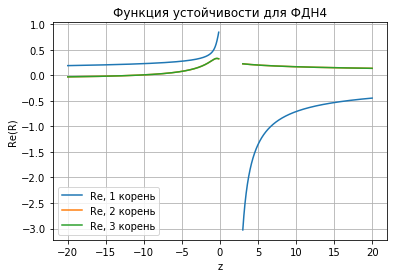

<string>:2: RuntimeWarning: invalid value encountered in power
c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\scimath.py:122: RuntimeWarning: invalid value encountered in less
  if any(isreal(x) & (x < 0)):
c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\scimath.py:226: RuntimeWarning: invalid value encountered in sqrt
  return nx.sqrt(x)
<string>:2: RuntimeWarning: invalid value encountered in true_divide


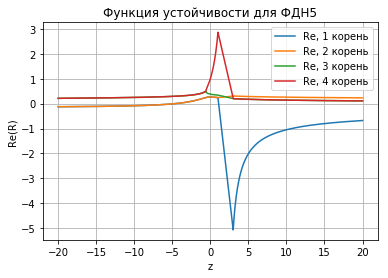

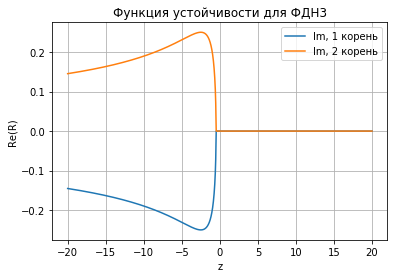

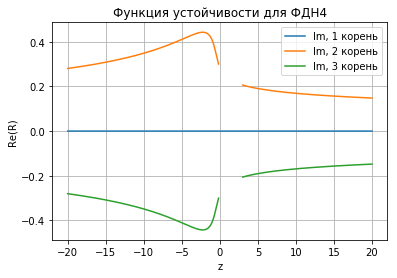

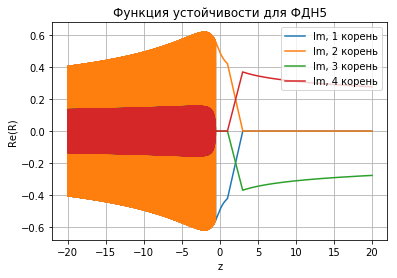

In [22]:
from sympy import solve, symbols, Rational, I, lambdify

R, z = symbols('R z')

R_2 = (Rational(3, 2) - z)*R**2 - 2*R + Rational(1, 2)
R_3 = (Rational(11, 6) - z)*R**3 - 3*R**2 + Rational(3, 2)*R - Rational(1, 3)
R_4 = (Rational(25, 12) - z)*R**4 - 4*R**3 + 3*R**2 - Rational(4, 3)*R + Rational(1, 4)

# Решения
R_2_sols = solve(R_2, R)
R_3_sols = solve(R_3, R)
R_4_sols = solve(R_4, R)

# Построим решения в действительных осях
intervals = ((-20, -3), (-3, 0), (0, 1), (3, 20))
z_range = np.concatenate(
    (
        [np.linspace(*interval, 10**4) for interval in intervals]
    ), axis=None)
#z_range = np.linspace(-20, -10, 10**4)
methods_funcs = [
    lambdify(z, R_2_sols),
    lambdify(z, R_3_sols),
    lambdify(z, R_4_sols)
]
for i, multi_func  in enumerate(methods_funcs):
    for i, y_range in enumerate(multi_func(z_range)):
        plt.plot(z_range, np.real(y_range), label='Re, {} корень'.format(i+1))
        #plt.plot(z_range, np.imag(y_range), label='Im, {} корень'.format(i+1))
    plt.xlabel('z')
    plt.ylabel('Re(R)')
    plt.title('Функция устойчивости для ФДН{}'.format(i+2))
    plt.legend()
    plt.grid()
    plt.show()

for i, multi_func  in enumerate(methods_funcs):
    for i, y_range in enumerate(multi_func(z_range)):
        #plt.plot(z_range, np.real(y_range), label='Re, {} корень'.format(i+1))
        plt.plot(z_range, np.imag(y_range), label='Im, {} корень'.format(i+1))
    plt.xlabel('z')
    plt.ylabel('Re(R)')
    plt.title('Функция устойчивости для ФДН{}'.format(i+2))
    plt.legend()
    plt.grid()
    plt.show()

На графиках заметно, что действительная часть имеет разрыв где-то в области [0, 2], причем ближе к точке 2 $Re(z)$ уходит на $-\infty$ для одного из корней (это не показано на графике, т.к. иначе сбились бы оси). Для метода ФДН5 на графиках имеем целую область значений для $z \in [-20, -2]$. Возможно, это связано с вычислительными ошибками, которые привели к быстрой осцилляции $Im(R)$, что на графике отразилось как сплошная закраска.